# Hedonic Regression- Real Estate Features

## Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


## Setting the data frame

In [5]:
df=pd.read_csv('

## Exploratory Data Analysis

### displaying the first five rows

In [8]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


### Checking the non null count and the data types of the columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Checking the stats summary

In [12]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Removing the No column as it is insignificant 

In [14]:
df_without_no = df.drop(['No'], axis=1)

#### Checking the new data frame 

In [16]:
df_without_no.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


#### X2 house age

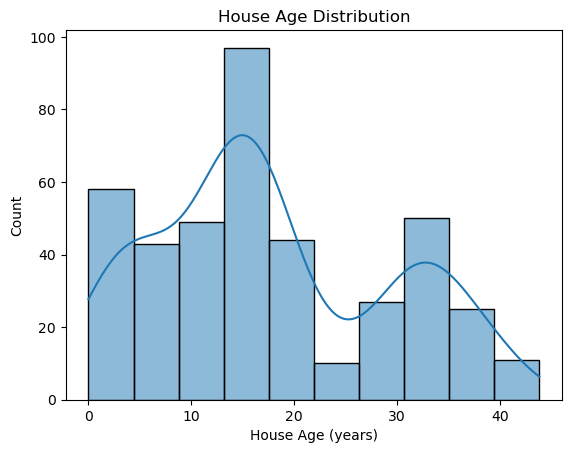

In [20]:
sns.histplot(df['X2 house age'], kde=True)
plt.title("House age distribution ")
plt.xlabel("House age(years)")
plt.show()


1. The KDE line shows multiple peaks, indicating non-uniform distribution — likely multiple "generations" or construction booms in different time periods.
2. The peak is around 15 years and 30–35 years, with a dip around 20–25 years.
3. The histogram is slightly right-skewed, meaning more houses are newer, with fewer very old houses (especially after 40 years).
4. Outliers/Potential Gaps indicate that there’s a drop near the 20–25 year mark and again after 40 years.
5. This might hint at regulatory, economic, or developmental changes that affected housing supply.

#### X3 distance to the nearest MRT station

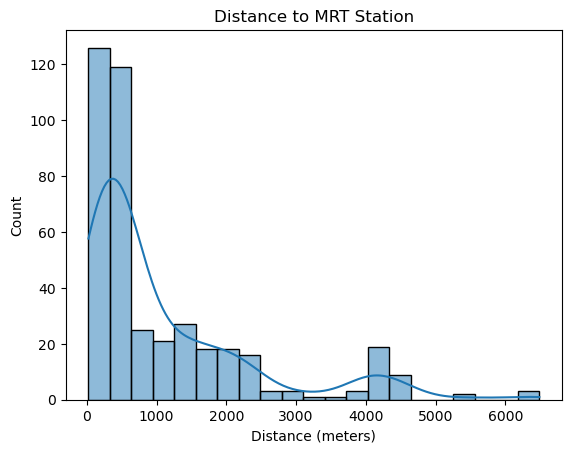

In [23]:
sns.histplot(df['X3 distance to the nearest MRT station'], kde=True)
plt.title("Distance to MRT Station")
plt.xlabel("Distance (meters)")
plt.show()


1. We see that the histogram is right skewed meaning that the majority of houses are very close to MRT stations — distances are heavily concentrated under 1000 meters.
2. There's a long tail extending toward 6000+ meters, indicating a few properties are significantly farther.
3. There is a strong peak near 0-500 meters.

#### X4 number of convenience stores

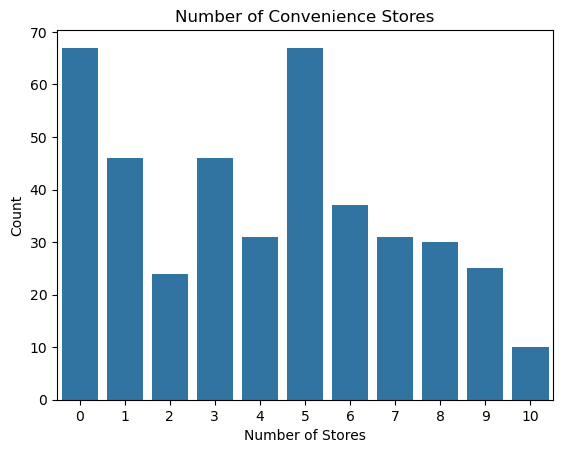

In [26]:
sns.countplot(x='X4 number of convenience stores', data=df)
plt.title("Number of Convenience Stores")
plt.xlabel("Number of Stores")
plt.ylabel("Count")
plt.show()

The count is maximum at 0 and 5 and it is decreasing after 5 making it slightly right skewed.

#### House Price per Unit Area

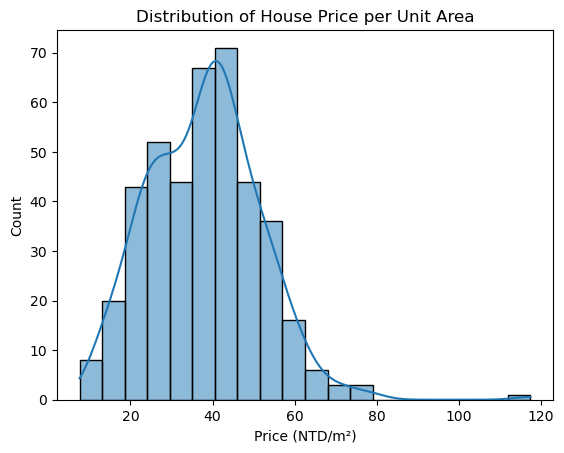

In [29]:
# 💰 House Price per Unit Area
sns.histplot(df['Y house price of unit area'], bins=20, kde=True)
plt.title("Distribution of House Price per Unit Area")
plt.xlabel("Price (NTD/m²)")
plt.ylabel("Count")
plt.show()

The distribution is right skewed. Most properties are clustered between 20 to 60 NTD/m². A few properties have very high prices (up to ~115 NTD/m²), which could be outliers or premium locations.

## Bivariate Analysis

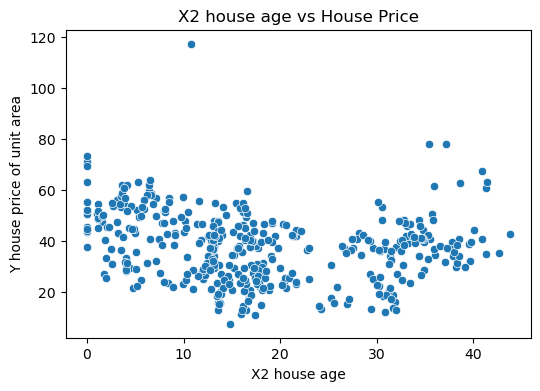

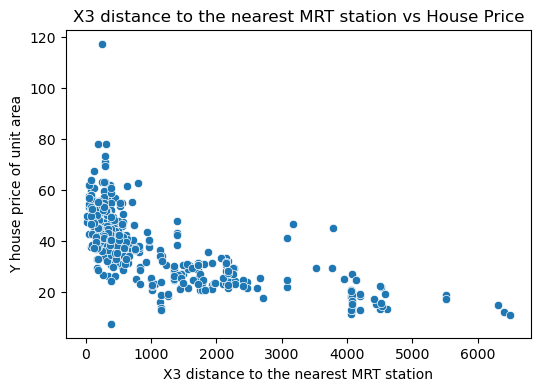

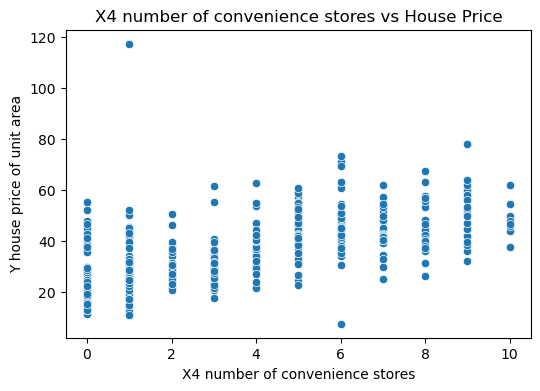

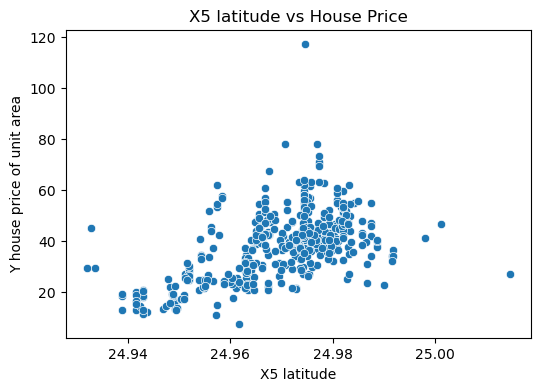

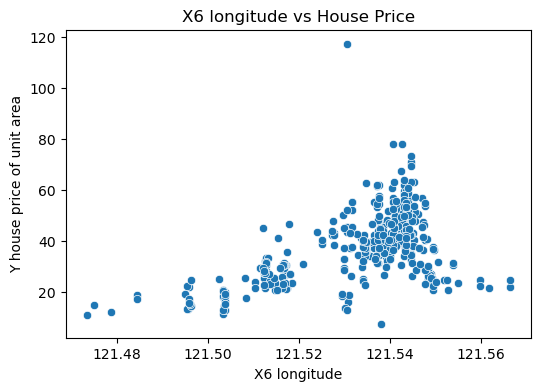

In [32]:
features = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

for feature in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df['Y house price of unit area'])
    plt.title(f'{feature} vs House Price')
    plt.show()

As per graphs a lot of these parameters have not so close linear relationship with our dependent variable Y. Hence, we will take a log of these values.

In [34]:
import numpy as np

columns_to_log = ['X2 house age', 'X3 distance to the nearest MRT station', 
                  'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

# Ensure all values are positive
if (df[columns_to_log] <= 0).any().any():
    print("Some values are non-positive; consider using np.log1p() instead.")
    df_log = df.copy()
    df_log[columns_to_log] = np.log1p(df[columns_to_log])  # log(1 + x)
else:
    df_log = df.copy()
    df_log[columns_to_log] = np.log(df[columns_to_log])    # standard log

df_log.head()

Some values are non-positive; consider using np.log1p() instead.


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,3.496508,4.452937,2.397895,3.257442,4.808439,37.9
1,2,2012.916667,3.020425,5.728783,2.302585,3.257340,4.808434,42.2
2,3,2013.583333,2.660260,6.333252,1.791759,3.257614,4.808469,47.3
3,4,2013.500000,2.660260,6.333252,1.791759,3.257614,4.808469,54.8
4,5,2012.833333,1.791759,5.970160,1.791759,3.257303,4.808458,43.1


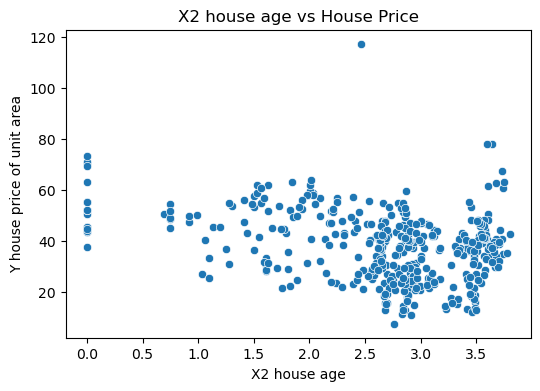

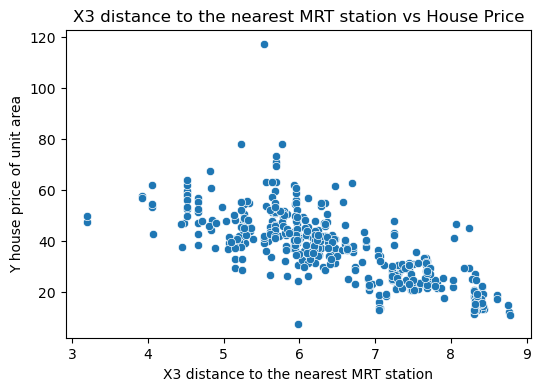

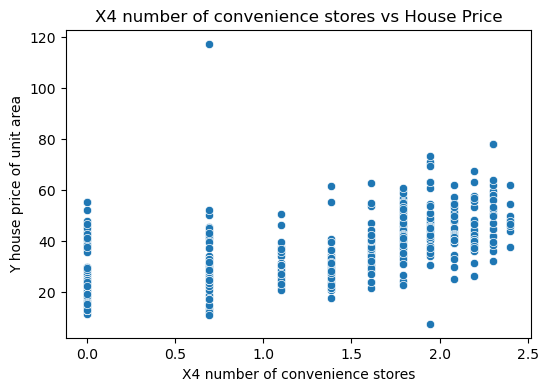

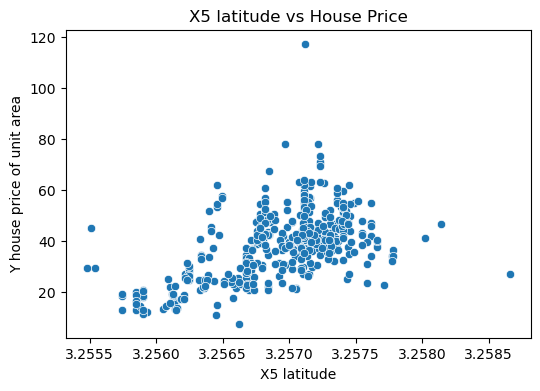

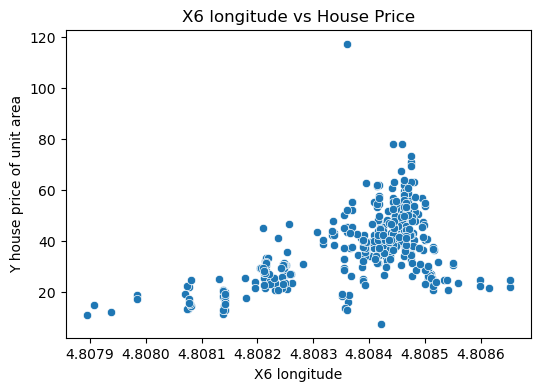

In [35]:
features = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

for feature in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_log[feature], y=df_log['Y house price of unit area'])
    plt.title(f'{feature} vs House Price')
    plt.show()

In [36]:
from sklearn.preprocessing import Normalizer

# Select columns to standardize
columns_to_scale = ['X2 house age', 'X3 distance to the nearest MRT station', 
                    'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

# Initialize the scaler
scaler = Normalizer()

# Fit and transform
df_scaled = df_log.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_log[columns_to_scale])
df_scaled.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,0.413401,0.526482,0.283509,0.385136,0.568514,37.9
1,2,2012.916667,0.335654,0.636629,0.255882,0.361982,0.534352,42.2
2,3,2013.583333,0.290032,0.690477,0.195345,0.355158,0.524239,47.3
3,4,2013.500000,0.290032,0.690477,0.195345,0.355158,0.524239,54.8
4,5,2012.833333,0.205807,0.685750,0.205807,0.374143,0.552314,43.1


## Correlation Matrix

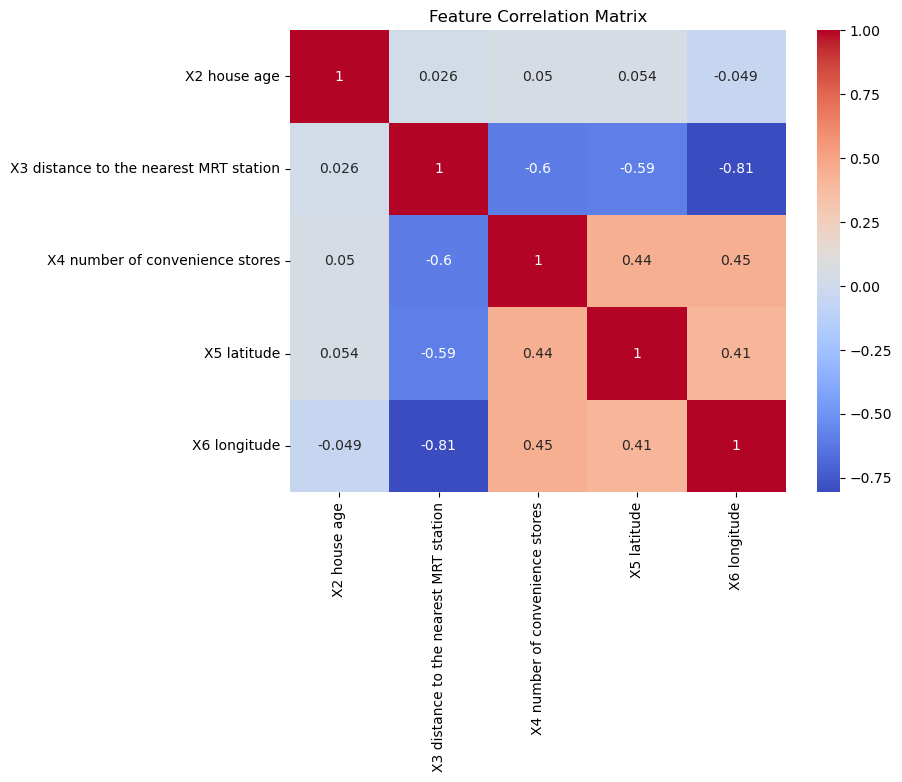

In [38]:
# Correlation Matrix
corr = df[features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


## VIF

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF dataframe
X_vif = df[features]
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)


                                  feature           VIF
0                            X2 house age  3.470796e+00
1  X3 distance to the nearest MRT station  2.970976e+00
2         X4 number of convenience stores  4.732308e+00
3                             X5 latitude  5.913399e+06
4                            X6 longitude  5.913114e+06


| VIF Value | Interpretation                               | Action                     |
| --------- | -------------------------------------------- | -------------------------- |
| 1         | No correlation with other features           | ✅ Safe                     |
| 1 – 5     | Moderate correlation, acceptable             | ✅ Usually acceptable       |
| 5 – 10    | High correlation, possible multicollinearity | ⚠️ Consider removing       |
| > 10      | Very high multicollinearity                  | ❌ Strong candidate to drop |


 


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data split
X = df_scaled[features]
y = df_scaled['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

NameError: name 'df_scaled' is not defined

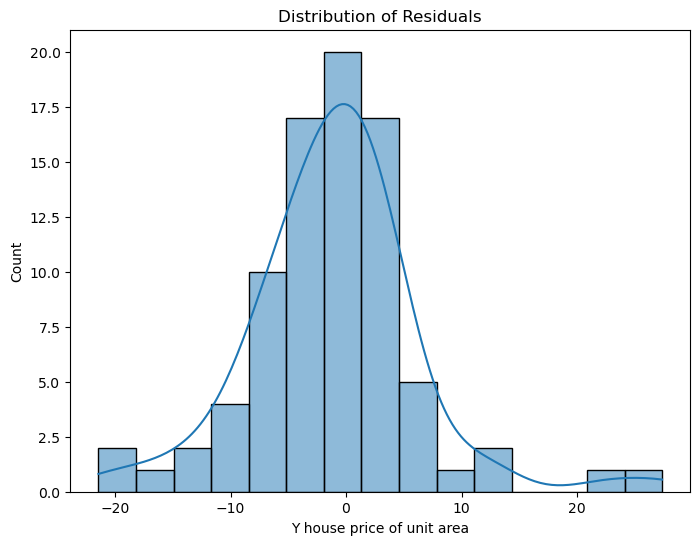

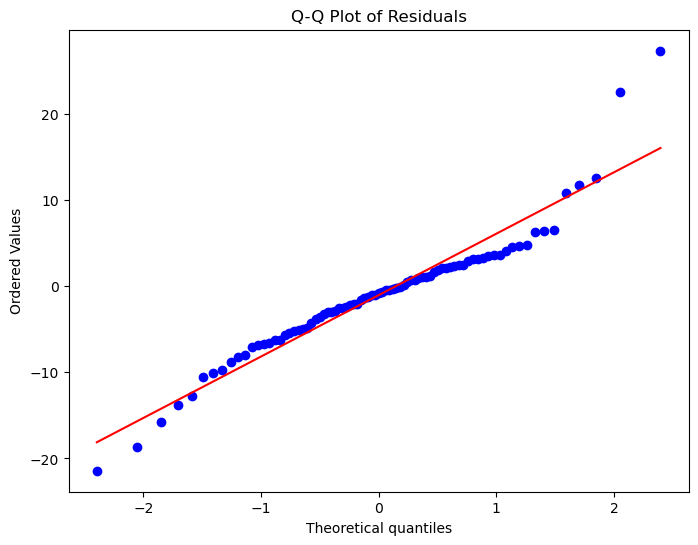

In [43]:
import scipy.stats as stats

# Histogram
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

# Q-Q plot
plt.figure(figsize=(8,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [44]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson statistic
dw = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw:.2f}')


Durbin-Watson statistic: 1.79


## Model Building

In [86]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [90]:
# Data split
X = df_scaled[features]
y = df_scaled['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
residuals = y_test - y_pred

In [71]:
import statsmodels.api as sm 

In [73]:
X = sm.add_constant(X)

In [77]:
model = sm.OLS(y, X).fit()

In [79]:
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.638
Model:                                    OLS   Adj. R-squared:                  0.633
Method:                         Least Squares   F-statistic:                     143.6
Date:                        Sun, 04 May 2025   Prob (F-statistic):           1.36e-87
Time:                                14:05:01   Log-Likelihood:                -1457.6
No. Observations:                         414   AIC:                             2927.
Df Residuals:                             408   BIC:                             2951.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

📈 Interpretation of Output

In the summary():

coef: The estimated impact of each feature on the house price
p-value: If < 0.05 → the variable significantly affects price
R-squared: How much of the variation in price is explained by the model
